In [1]:
!which python

/data/gpfs/assoc/parchmanlab/tfaske/anaconda3/envs/py36/bin/python


In [2]:
!source activate py36

/usr/bin/sh: line 0: source: activate: file not found


In [3]:
import sys

#sys.path.append('/home/faske/g/anaconda3/envs/py34/lib/python3.4/site-packages')
sys.path.append('/data/gpfs/assoc/parchmanlab/tfaske/anaconda3/envs/py36/lib/python3.6/site-packages')
sys.path.append("/data/gpfs/assoc/parchmanlab/tfaske/ipynb/include_utils")

import ipyparallel as ipp
import os, time
import include_utils as u
import pandas as pd
import numpy as np
import scipy as sp
import random
import numbers
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
#import vcf
from sklearn import preprocessing
from subprocess import Popen, PIPE, call, check_output
import seaborn as sns
from IPython.display import FileLink
import urllib.request as urllib2
import dill
import traceback
from pandas import Series, DataFrame
import gzip
import warnings
warnings.filterwarnings('ignore',category=pd.io.pytables.PerformanceWarning)
%config InlineBackend.figure_format = 'retina'
from Bio import SeqIO
#import pysam
from collections import OrderedDict, namedtuple, Counter
import operator
import multiprocessing as mp
import shutil
import tempfile
#from ipyparallel import Client
import scandir
import glob
from Bio.SeqIO.QualityIO import FastqGeneralIterator
import pickle
import re
from itertools import chain
#import Levenshtein as lv

In [4]:
vcfutils = "vcfutils.pl"
vcftools = "vcftools"
bcftools = "bcftools"
bgzip = "bgzip"
tabix = "tabix"
java = "java"
plink = "plink --noweb"

In [5]:
analysis_dir = '/data/gpfs/home/tfaske/d/milkweed/filtering'

In [6]:
cd $analysis_dir

/data/gpfs/assoc/denovo/tfaske/milkweed/filtering


In [7]:
vcf_file = os.path.join(analysis_dir, "samtools1-9.milkweed.vcf.gz")
assert os.path.exists(vcf_file)
vcf_file

'/data/gpfs/home/tfaske/d/milkweed/filtering/samtools1-9.milkweed.vcf.gz'

## make 012 and remove pop SB and NI outliers

Remove all SB pop and c('FA_NI_587','FA_NI_588','FA_NI_589','FA_NI_590')

In [16]:
!$vcftools --gzvcf $vcf_file \
--out $vcf_file \
--012


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/milkweed/filtering/samtools1-9.milkweed.vcf.gz
	--012
	--out /data/gpfs/home/tfaske/d/milkweed/filtering/samtools1-9.milkweed.vcf.gz

Using zlib version: 1.2.11
After filtering, kept 176 out of 176 Individuals
Writing 012 matrix files ... 	012: Only outputting biallelic loci.
^C


In [8]:
!grep 'SB' 'samtools1-9.milkweed.vcf.gz.012.indv' > remove_outliers.txt
!grep 'FA_NI_587' 'samtools1-9.milkweed.vcf.gz.012.indv' >> remove_outliers.txt
!grep 'FA_NI_588' 'samtools1-9.milkweed.vcf.gz.012.indv' >> remove_outliers.txt
!grep 'FA_NI_589' 'samtools1-9.milkweed.vcf.gz.012.indv' >> remove_outliers.txt
!grep 'FA_NI_590' 'samtools1-9.milkweed.vcf.gz.012.indv' >> remove_outliers.txt
!cat remove_outliers.txt

/working/tfaske/milkweed/SNPcall/bowtie2/FA_SB_789.fastq.gz_sorted.bam
/working/tfaske/milkweed/SNPcall/bowtie2/FA_SB_790.fastq.gz_sorted.bam
/working/tfaske/milkweed/SNPcall/bowtie2/FA_SB_791.fastq.gz_sorted.bam
/working/tfaske/milkweed/SNPcall/bowtie2/FA_SB_792.fastq.gz_sorted.bam
/working/tfaske/milkweed/SNPcall/bowtie2/FA_SB_793.fastq.gz_sorted.bam
/working/tfaske/milkweed/SNPcall/bowtie2/FA_SB_794.fastq.gz_sorted.bam
/working/tfaske/milkweed/SNPcall/bowtie2/FA_SB_795.fastq.gz_sorted.bam
/working/tfaske/milkweed/SNPcall/bowtie2/FA_SB_796.fastq.gz_sorted.bam
/working/tfaske/milkweed/SNPcall/bowtie2/FA_SB_797.fastq.gz_sorted.bam
/working/tfaske/milkweed/SNPcall/bowtie2/FA_SB_798.fastq.gz_sorted.bam
/working/tfaske/milkweed/SNPcall/bowtie2/FA_SB_799.fastq.gz_sorted.bam
/working/tfaske/milkweed/SNPcall/bowtie2/FA_SB_800.fastq.gz_sorted.bam
/working/tfaske/milkweed/SNPcall/bowtie2/FA_NI_587.fastq.gz_sorted.bam
/working/tfaske/milkweed/SNPcall/bowtie2/FA_NI_588.fastq.gz_sorted.bam
/worki

In [9]:
!$vcftools --gzvcf $vcf_file \
--remove-filtered-all \
--recode \
--recode-INFO-all \
--remove {os.path.join(analysis_dir, "remove_outliers.txt")} \
--out {os.path.join(analysis_dir, "milkweed_minusSB")}


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/milkweed/filtering/samtools1-9.milkweed.vcf.gz
	--remove /data/gpfs/home/tfaske/d/milkweed/filtering/remove_outliers.txt
	--recode-INFO-all
	--out /data/gpfs/home/tfaske/d/milkweed/filtering/milkweed_minusSB
	--recode
	--remove-filtered-all

Using zlib version: 1.2.11
Excluding individuals in 'exclude' list
After filtering, kept 160 out of 176 Individuals
Outputting VCF file...
After filtering, kept 1255808 out of a possible 1255808 Sites
Run Time = 739.00 seconds


In [11]:
vcf_remove = os.path.join(analysis_dir, "milkweed_minusSB.recode.vcf")
vcf_file = vcf_remove + ".gz"
!$bgzip -c {vcf_remove} > {vcf_file}
!$tabix {vcf_file}

# Filter first round 
    missing data, MAF, biallelic

In [12]:
!$vcftools --remove-indels \
--max-missing 0.7 \
--min-alleles 2 \
--max-alleles 2 \
--maf 0.02 \
--thin 5 \
--remove-filtered-all \
--recode \
--recode-INFO-all \
--gzvcf \
$vcf_file \
--out $'milkweed_miss70_thin5_MAF2'


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/milkweed/filtering/milkweed_minusSB.recode.vcf.gz
	--recode-INFO-all
	--maf 0.02
	--max-alleles 2
	--min-alleles 2
	--thin 5
	--max-missing 0.7
	--out milkweed_miss70_thin5_MAF2
	--recode
	--remove-filtered-all
	--remove-indels

Using zlib version: 1.2.11
After filtering, kept 160 out of 160 Individuals
Outputting VCF file...
After filtering, kept 55778 out of a possible 1255808 Sites
Run Time = 79.00 seconds


In [13]:
!$vcftools --remove-indels \
--max-missing 0.7 \
--min-alleles 2 \
--max-alleles 2 \
--maf 0.02 \
--thin 50 \
--remove-filtered-all \
--recode \
--recode-INFO-all \
--gzvcf \
$vcf_file \
--out $'milkweed_miss70_thin50_MAF2'


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/milkweed/filtering/milkweed_minusSB.recode.vcf.gz
	--recode-INFO-all
	--maf 0.02
	--max-alleles 2
	--min-alleles 2
	--thin 50
	--max-missing 0.7
	--out milkweed_miss70_thin50_MAF2
	--recode
	--remove-filtered-all
	--remove-indels

Using zlib version: 1.2.11
After filtering, kept 160 out of 160 Individuals
Outputting VCF file...
After filtering, kept 32290 out of a possible 1255808 Sites
Run Time = 66.00 seconds


In [14]:
!$vcftools --remove-indels \
--max-missing 0.6 \
--min-alleles 2 \
--max-alleles 2 \
--maf 0.01 \
--thin 50 \
--remove-filtered-all \
--recode \
--recode-INFO-all \
--gzvcf \
$vcf_file \
--out $'milkweed_miss60_thin50_MAF2'


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/milkweed/filtering/milkweed_minusSB.recode.vcf.gz
	--recode-INFO-all
	--maf 0.01
	--max-alleles 2
	--min-alleles 2
	--thin 50
	--max-missing 0.6
	--out milkweed_miss60_thin50_MAF2
	--recode
	--remove-filtered-all
	--remove-indels

Using zlib version: 1.2.11
After filtering, kept 160 out of 160 Individuals
Outputting VCF file...
After filtering, kept 40045 out of a possible 1255808 Sites
Run Time = 71.00 seconds


In [15]:
!$vcftools --remove-indels \
--max-missing 0.7 \
--min-alleles 2 \
--max-alleles 2 \
--maf 0.02 \
--thin 100 \
--remove-filtered-all \
--recode \
--recode-INFO-all \
--gzvcf \
$vcf_file \
--out $'milkweed_miss70_thin100_MAF2'


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/milkweed/filtering/milkweed_minusSB.recode.vcf.gz
	--recode-INFO-all
	--maf 0.02
	--max-alleles 2
	--min-alleles 2
	--thin 100
	--max-missing 0.7
	--out milkweed_miss70_thin100_MAF2
	--recode
	--remove-filtered-all
	--remove-indels

Using zlib version: 1.2.11
After filtering, kept 160 out of 160 Individuals
Outputting VCF file...
After filtering, kept 27100 out of a possible 1255808 Sites
Run Time = 62.00 seconds


In [16]:
!$vcftools --remove-indels \
--max-missing 0.6 \
--min-alleles 2 \
--max-alleles 2 \
--maf 0.02 \
--thin 100 \
--remove-filtered-all \
--recode \
--recode-INFO-all \
--gzvcf \
$vcf_file \
--out $'milkweed_miss60_thin100_MAF2'


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/milkweed/filtering/milkweed_minusSB.recode.vcf.gz
	--recode-INFO-all
	--maf 0.02
	--max-alleles 2
	--min-alleles 2
	--thin 100
	--max-missing 0.6
	--out milkweed_miss60_thin100_MAF2
	--recode
	--remove-filtered-all
	--remove-indels

Using zlib version: 1.2.11
After filtering, kept 160 out of 160 Individuals
Outputting VCF file...
After filtering, kept 30201 out of a possible 1255808 Sites
Run Time = 65.00 seconds


In [17]:
vcf_filtered = "%s.recode.vcf" % '/data/gpfs/home/tfaske/d/milkweed/filtering/milkweed_miss70_thin100_MAF2'
vcf_filtered_gz = "%s.gz" % vcf_filtered

In [18]:
!$bgzip -c $vcf_filtered > {vcf_filtered_gz}
!$tabix {vcf_filtered_gz}

# Remove bad_indv


In [19]:
!$vcftools --gzvcf $vcf_filtered_gz --out $vcf_filtered_gz --missing-indv


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/milkweed/filtering/milkweed_miss70_thin100_MAF2.recode.vcf.gz
	--missing-indv
	--out /data/gpfs/home/tfaske/d/milkweed/filtering/milkweed_miss70_thin100_MAF2.recode.vcf.gz

Using zlib version: 1.2.11
After filtering, kept 160 out of 160 Individuals
Outputting Individual Missingness
After filtering, kept 27100 out of a possible 27100 Sites
Run Time = 1.00 seconds


In [20]:
def get_imiss(vcf_file):
    imiss_file = !ls {vcf_file}.imiss
    imiss_df = pd.read_csv(imiss_file[0], sep="\t")
    imiss_df.index = imiss_df.INDV
    return imiss_df

In [21]:
imiss_df = get_imiss(vcf_filtered_gz)
imiss_df.head()

,INDV,N_DATA,N_GENOTYPES_FILTERED,N_MISS,F_MISS
INDV,,,,,
/working/tfaske/milkweed/SNPcall/bowtie2/FA_BM_607.fastq.gz_sorted.bam,/working/tfaske/milkweed/SNPcall/bowtie2/FA_BM...,27100,0,309,0.011402
/working/tfaske/milkweed/SNPcall/bowtie2/FA_BM_608.fastq.gz_sorted.bam,/working/tfaske/milkweed/SNPcall/bowtie2/FA_BM...,27100,0,735,0.027122
/working/tfaske/milkweed/SNPcall/bowtie2/FA_BM_609.fastq.gz_sorted.bam,/working/tfaske/milkweed/SNPcall/bowtie2/FA_BM...,27100,0,1925,0.071033
/working/tfaske/milkweed/SNPcall/bowtie2/FA_BM_610.fastq.gz_sorted.bam,/working/tfaske/milkweed/SNPcall/bowtie2/FA_BM...,27100,0,2628,0.096974
/working/tfaske/milkweed/SNPcall/bowtie2/FA_BM_611.fastq.gz_sorted.bam,/working/tfaske/milkweed/SNPcall/bowtie2/FA_BM...,27100,0,451,0.016642


In [22]:
imiss_df.F_MISS.describe()

count    160.000000
mean       0.120188
std        0.217778
min        0.008192
25%        0.025489
50%        0.033561
75%        0.067712
max        0.931107
Name: F_MISS, dtype: float64

In [23]:
len(imiss_df),len(imiss_df[imiss_df.F_MISS >= .4]),len(imiss_df[imiss_df.F_MISS >= .5]), len(imiss_df[imiss_df.F_MISS >= .25])


(160, 17, 15, 21)

In [24]:
bad_indv = imiss_df.INDV[imiss_df.F_MISS >= .4]

In [25]:
with open(os.path.join(analysis_dir, "bad_indv.txt"), "w") as o:
    o.write("INDV\n")
    for elem in bad_indv.index:
        o.write("%s\n" % elem)

In [26]:
!$vcftools --gzvcf $vcf_filtered_gz \
--remove-indels  \
--remove-filtered-all \
--recode \
--recode-INFO-all \
--remove {os.path.join(analysis_dir, "bad_indv.txt")} \
--out {os.path.join(analysis_dir, "snps_indv_removed")}


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/milkweed/filtering/milkweed_miss70_thin100_MAF2.recode.vcf.gz
	--remove /data/gpfs/home/tfaske/d/milkweed/filtering/bad_indv.txt
	--recode-INFO-all
	--out /data/gpfs/home/tfaske/d/milkweed/filtering/snps_indv_removed
	--recode
	--remove-filtered-all
	--remove-indels

Using zlib version: 1.2.11
Excluding individuals in 'exclude' list
After filtering, kept 143 out of 160 Individuals
Outputting VCF file...
After filtering, kept 27100 out of a possible 27100 Sites
Run Time = 16.00 seconds


In [27]:
vcf_bad_remove = os.path.join(analysis_dir, "snps_indv_removed.recode.vcf")
vcf_bad_remove_gz = vcf_bad_remove + ".gz"
!$bgzip -c {vcf_bad_remove} > {vcf_bad_remove_gz}
!$tabix {vcf_bad_remove_gz}

# Filter snps further 
this needs to be done after removing individuals


In [28]:
def get_vcf_stats(vcf_gz):
    
    stats = ['depth',
            'site-depth',
            'site-mean-depth',
            'site-quality',
            'missing-site',
            'freq',
            'counts',
            'hardy',
            'het']
    
    for stat in stats:
        !$vcftools --gzvcf $vcf_gz \
        --out $vcf_gz \
        {"--%s" % stat} 

In [29]:
get_vcf_stats(vcf_bad_remove_gz)


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/milkweed/filtering/snps_indv_removed.recode.vcf.gz
	--depth
	--out /data/gpfs/home/tfaske/d/milkweed/filtering/snps_indv_removed.recode.vcf.gz

Using zlib version: 1.2.11
After filtering, kept 143 out of 143 Individuals
Outputting Mean Depth by Individual
After filtering, kept 27100 out of a possible 27100 Sites
Run Time = 1.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/milkweed/filtering/snps_indv_removed.recode.vcf.gz
	--out /data/gpfs/home/tfaske/d/milkweed/filtering/snps_indv_removed.recode.vcf.gz
	--site-depth

Using zlib version: 1.2.11
After filtering, kept 143 out of 143 Individuals
Outputting Depth for Each Site
After filtering, kept 27100 out of a possible 27100 Sites
Run Time = 1.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as in

After filtering, kept 27100 out of a possible 27100 Sites
Run Time = 1.00 seconds


In [30]:
#pd.set_option('display.max_columns', 100)

def get_MAF(row):
    try:
        return np.min([row.A1_freq, row.A2_freq])
    except:
        print(row)
        
def get_correction(n):
    #for finite sample size
    return (2*n)/(2*n-1)

def calculate_Fis(vals):
    try:
        data = [float(x) for x in vals.split("/")]
        assert len(data) == 3
        num_individuals = np.sum(data)
        total_alleles = 2*num_individuals
        a1_count = 2*data[0]
        a2_count = 2*data[2]
        het_count = data[1]
        a1_count += het_count
        a2_count += het_count
        a1_freq = a1_count/total_alleles
        a2_freq = a2_count/total_alleles
        assert a1_freq + a2_freq == 1.0
        He = 2 * a1_freq * a2_freq * get_correction(num_individuals)
        Ho = het_count/num_individuals
        Fis = 1 - (Ho/He)
        return Fis
    except:
        return -9

def combine_vcf_stats(filedir, prefix):
    
    hardy_files = !ls {filedir}/{prefix}.hwe
    hardy = pd.read_csv(hardy_files[0], sep="\t")

    hardy.columns = ['CHROM', 'POS', 'OBS(HOM1/HET/HOM2)', 'E(HOM1/HET/HOM2)', 'ChiSq_HWE',
       'P_HWE', 'P_HET_DEFICIT', 'P_HET_EXCESS']
    hardy.index = hardy.apply(lambda x: "%s-%d" % (x.CHROM, x.POS), axis=1)
    
    loci_files = !ls {filedir}/{prefix}.l* | grep -v log
    loci_df = pd.concat([pd.read_csv(x, sep="\t", skiprows=0) for x in loci_files], axis=1)
    chrom_pos = loci_df.ix[:,0:2]
    
    frq_files = !ls {filedir}/{prefix}.frq* | grep -v count
    frq_data = []
    h = open(frq_files[0])
    header = h.readline().strip().split()
    for line in h:
        frq_data.append(line.strip().split('\t'))

    header = ['CHROM', 'POS', 'N_ALLELES', 'N_CHR', 'A1_FREQ', "A2_FREQ"]
    frq_df = pd.DataFrame(frq_data)
    print(frq_df.columns)
    #frq_df = frq_df.drop([6,7],axis=1)
    frq_df.columns = header
    frq_df.index = frq_df.apply(lambda x: "%s-%s" % (x.CHROM, x.POS), axis=1)
    
    loci_df = loci_df.drop(['CHROM','CHR','POS'], axis=1)
    loci_df = pd.concat([chrom_pos, loci_df], axis=1)
    loci_df.index = loci_df.apply(lambda x: "%s-%d" % (x.CHROM, x.POS), axis=1)
    
    loci_df = pd.concat([loci_df, frq_df, hardy], axis=1)
    loci_df["A1_allele"] = loci_df.apply(lambda row: row.A1_FREQ.split(":")[0], axis=1)
    loci_df["A2_allele"] = loci_df.apply(lambda row: row.A2_FREQ.split(":")[0], axis=1)
    
    loci_df["A1_freq"] = loci_df.apply(lambda row: float(row.A1_FREQ.split(":")[1]), axis=1)
    loci_df["A2_freq"] = loci_df.apply(lambda row: float(row.A2_FREQ.split(":")[1]), axis=1)
    
    loci_df['MAF'] = loci_df.apply(get_MAF, axis=1)
    loci_df = loci_df.drop(['CHROM', 'POS'], axis=1)
    
    loci_df['Fis'] = loci_df['OBS(HOM1/HET/HOM2)'].apply(calculate_Fis)
    
    return loci_df, frq_df, hardy

In [31]:
vcf_bad_remove_gz

'/data/gpfs/home/tfaske/d/milkweed/filtering/snps_indv_removed.recode.vcf.gz'

In [32]:
loci_df, frq_df, hardy = combine_vcf_stats(analysis_dir,'snps_indv_removed.recode.vcf.gz')

/data/gpfs/assoc/parchmanlab/tfaske/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:45: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/data/gpfs/assoc/parchmanlab/tfaske/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


RangeIndex(start=0, stop=6, step=1)


In [33]:
loci_df

,SUM_DEPTH,SUMSQ_DEPTH,MEAN_DEPTH,VAR_DEPTH,N_DATA,N_GENOTYPE_FILTERED,N_MISS,F_MISS,QUAL,N_ALLELES,...,ChiSq_HWE,P_HWE,P_HET_DEFICIT,P_HET_EXCESS,A1_allele,A2_allele,A1_freq,A2_freq,MAF,Fis
AS0.3ch10-8432,1238,13882,8.65734,22.2832,286,0,6,0.020979,999.0,2,...,0.225448,4.802792e-01,4.802792e-01,0.883951,C,A,0.932143,0.067857,0.067857,0.043557
AS0.3ch10-19771,1662,24498,11.62240,36.4902,286,0,12,0.041958,999.0,2,...,0.045160,8.487136e-01,4.717111e-01,0.674848,A,G,0.335766,0.664234,0.335766,0.021739
AS0.3ch10-25184,536,7110,3.74825,35.9221,286,0,48,0.167832,999.0,2,...,4.288680,4.184443e-02,3.065872e-02,0.989547,G,A,0.281513,0.718487,0.281513,0.193244
AS0.3ch10-29612,5083,216733,35.54550,253.9120,286,0,0,0.000000,999.0,2,...,0.247384,4.725812e-01,4.725812e-01,0.888173,C,A,0.933566,0.066434,0.066434,0.044944
AS0.3ch10-39389,4153,146997,29.04200,185.8150,286,0,2,0.006993,999.0,2,...,6.984191,1.226267e-02,1.226267e-02,0.997336,C,T,0.838028,0.161972,0.161972,0.224516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HiC_scaffold_686-2241,6973,472847,48.76220,935.4080,286,0,0,0.000000,133.0,2,...,105.310300,4.483712e-13,4.483712e-13,1.000000,C,G,0.080420,0.919580,0.080420,0.858654
HiC_scaffold_688-33835,3655,207043,25.55940,800.1640,286,0,14,0.048951,331.0,2,...,61.612430,1.189705e-13,1.189705e-13,1.000000,T,A,0.235294,0.764706,0.235294,0.674279
HiC_scaffold_688-63086,523,2685,3.65734,5.4381,286,0,16,0.055944,735.0,2,...,135.000000,2.097607e-08,2.097607e-08,1.000000,T,A,0.029630,0.970370,0.029630,1.000000
HiC_scaffold_689-22136,1722,27094,12.04200,44.7729,286,0,2,0.006993,999.0,2,...,0.003159,1.000000e+00,5.865412e-01,0.589277,T,G,0.253521,0.746479,0.253521,-0.001179


In [34]:
frq_df

,CHROM,POS,N_ALLELES,N_CHR,A1_FREQ,A2_FREQ
AS0.3ch10-8432,AS0.3ch10,8432,2,280,C:0.932143,A:0.0678571
AS0.3ch10-19771,AS0.3ch10,19771,2,274,A:0.335766,G:0.664234
AS0.3ch10-25184,AS0.3ch10,25184,2,238,G:0.281513,A:0.718487
AS0.3ch10-29612,AS0.3ch10,29612,2,286,C:0.933566,A:0.0664336
AS0.3ch10-39389,AS0.3ch10,39389,2,284,C:0.838028,T:0.161972
...,...,...,...,...,...,...
HiC_scaffold_686-2241,HiC_scaffold_686,2241,2,286,C:0.0804196,G:0.91958
HiC_scaffold_688-33835,HiC_scaffold_688,33835,2,272,T:0.235294,A:0.764706
HiC_scaffold_688-63086,HiC_scaffold_688,63086,2,270,T:0.0296296,A:0.97037
HiC_scaffold_689-22136,HiC_scaffold_689,22136,2,284,T:0.253521,G:0.746479


In [35]:
hardy

,CHROM,POS,OBS(HOM1/HET/HOM2),E(HOM1/HET/HOM2),ChiSq_HWE,P_HWE,P_HET_DEFICIT,P_HET_EXCESS
AS0.3ch10-8432,AS0.3ch10,8432,122/17/1,121.64/17.71/0.64,0.225448,4.802792e-01,4.802792e-01,0.883951
AS0.3ch10-19771,AS0.3ch10,19771,16/60/61,15.45/61.11/60.45,0.045160,8.487136e-01,4.717111e-01,0.674848
AS0.3ch10-25184,AS0.3ch10,25184,14/39/66,9.43/48.14/61.43,4.288680,4.184443e-02,3.065872e-02,0.989547
AS0.3ch10-29612,AS0.3ch10,29612,125/17/1,124.63/17.74/0.63,0.247384,4.725812e-01,4.725812e-01,0.888173
AS0.3ch10-39389,AS0.3ch10,39389,104/30/8,99.73/38.55/3.73,6.984191,1.226267e-02,1.226267e-02,0.997336
...,...,...,...,...,...,...,...,...
HiC_scaffold_686-2241,HiC_scaffold_686,2241,10/3/130,0.92/21.15/120.92,105.310300,4.483712e-13,4.483712e-13,1.000000
HiC_scaffold_688-33835,HiC_scaffold_688,33835,24/16/96,7.53/48.94/79.53,61.612430,1.189705e-13,1.189705e-13,1.000000
HiC_scaffold_688-63086,HiC_scaffold_688,63086,4/0/131,0.12/7.76/127.12,135.000000,2.097607e-08,2.097607e-08,1.000000
HiC_scaffold_689-22136,HiC_scaffold_689,22136,9/54/79,9.13/53.75/79.13,0.003159,1.000000e+00,5.865412e-01,0.589277


In [36]:
loci_out = os.path.join(analysis_dir,'loci_out.csv')
frq_out = os.path.join(analysis_dir,'frq_out.csv')
hardy_out = os.path.join(analysis_dir,'hardy_out.csv')

loci_df.to_csv(path_or_buf=loci_out)
frq_df.to_csv(path_or_buf=frq_out)
hardy.to_csv(path_or_buf=hardy_out)


In [37]:
loci_df.SUM_DEPTH.describe()

count     27100.000000
mean       3395.006790
std        7554.306817
min         196.000000
25%        1239.000000
50%        2388.000000
75%        3990.000000
max      762866.000000
Name: SUM_DEPTH, dtype: float64

In [38]:
loci_df.QUAL.describe()

count    27100.000000
mean       766.443220
std        342.225152
min          3.060160
25%        514.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: QUAL, dtype: float64

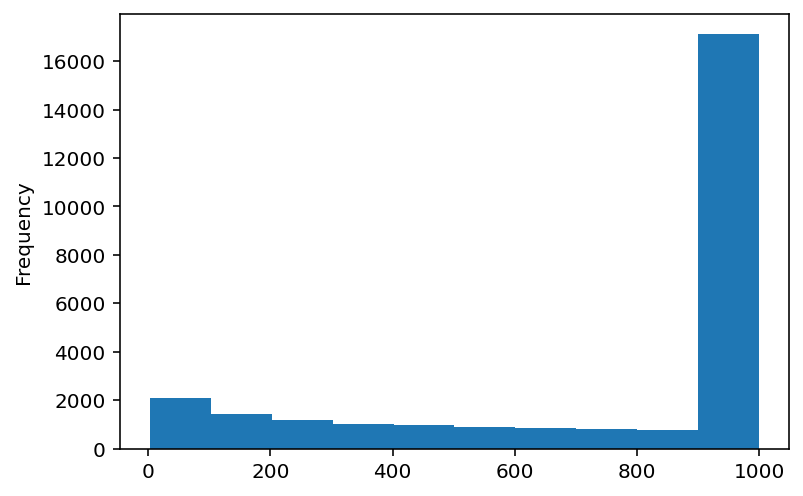

In [39]:
loci_df.QUAL.plot(kind="hist");

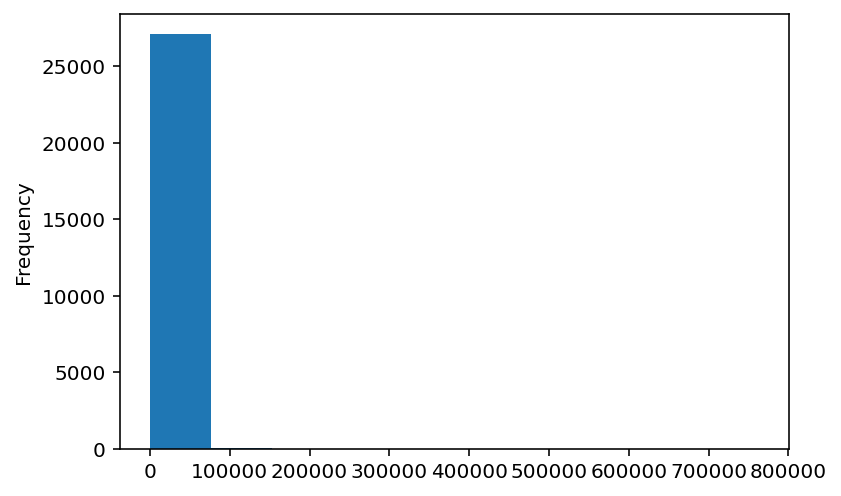

In [40]:
loci_df.SUM_DEPTH.plot(kind="hist");

In [41]:
len(loci_df[loci_df.Fis == -9])

0

In [46]:
len(loci_df[loci_df.SUM_DEPTH <5000]),len(loci_df[loci_df.SUM_DEPTH >=500])

(22821, 25243)

In [47]:
len(loci_df[loci_df.QUAL >= 10]) - len(loci_df[loci_df.QUAL >= 20])

286

In [48]:
len(loci_df[loci_df.QUAL <  999]), len(loci_df[loci_df.QUAL < 500]), len(loci_df[loci_df.QUAL < 200])

(10681, 6652, 3458)

In [49]:
 len(loci_df[loci_df.Fis <= -0.5]), len(loci_df[loci_df.MAF < 0.02])

(339, 403)

In [55]:
def filter_snps(df, imputed=False):
    if imputed:
        return df[(df.MAF >= 0.01) &  
                  (df.Fis > -0.5)]
    else:
        return df[(df.SUM_DEPTH >= 500) & 
                  (df.SUM_DEPTH < 5000) & 
                  (df.QUAL >= 200) & 
                  (df.MAF >= 0.02) &  
                  (df.Fis > -0.5)]

In [56]:
loci_stage1 = filter_snps(loci_df)
loci_stage1.shape

(18083, 25)

In [57]:
with open(os.path.join(analysis_dir, "stage1_positions.txt"), "w") as o:
    for elem in loci_stage1.index:
        o.write("%s\n" % "\t".join(elem.split("-")))

In [58]:
!$vcftools --gzvcf $vcf_bad_remove_gz \
--remove-indels  \
--remove-filtered-all \
--recode \
--recode-INFO-all \
--positions {os.path.join(analysis_dir, "stage1_positions.txt")} \
--out {os.path.join(analysis_dir, "good_snps")}


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/milkweed/filtering/snps_indv_removed.recode.vcf.gz
	--recode-INFO-all
	--out /data/gpfs/home/tfaske/d/milkweed/filtering/good_snps
	--positions /data/gpfs/home/tfaske/d/milkweed/filtering/stage1_positions.txt
	--recode
	--remove-filtered-all
	--remove-indels

Using zlib version: 1.2.11
After filtering, kept 143 out of 143 Individuals
Outputting VCF file...
After filtering, kept 18083 out of a possible 27100 Sites
Run Time = 11.00 seconds


In [59]:
snps = os.path.join(analysis_dir, "good_snps.recode.vcf")
snps_gz = snps + ".gz"
!$bgzip -c {snps} > {snps_gz}
!$tabix {snps_gz}

# Plink / chrom_map

In [60]:
chroms = sorted(set([x.split("-")[0] for x in loci_df.index]))
len(chroms) # number of unique contigs

261

In [61]:
with open(os.path.join(analysis_dir, "chrom_map.txt"), "w") as o:
    for i, c in enumerate(chroms):
        o.write("%s\t%d\n" % (c, i))

In [62]:
def write_plink_files(vcf_gz):
    !$vcftools --gzvcf {vcf_gz} \
    --out {vcf_gz} \
    --plink \
    --chrom-map {os.path.join(analysis_dir, "chrom_map.txt")}

In [63]:
write_plink_files(snps_gz)


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/milkweed/filtering/good_snps.recode.vcf.gz
	--chrom-map /data/gpfs/home/tfaske/d/milkweed/filtering/chrom_map.txt
	--out /data/gpfs/home/tfaske/d/milkweed/filtering/good_snps.recode.vcf.gz
	--plink

Using zlib version: 1.2.11
After filtering, kept 143 out of 143 Individuals
Writing PLINK PED and MAP files ... 
	Read 262 chromosome mapping file entries.
Done.
After filtering, kept 18083 out of a possible 18083 Sites
Run Time = 2.00 seconds


# Make 012

In [64]:
f = os.path.join(analysis_dir, "good_snps.recode.vcf")
!$vcftools --gzvcf {f} \
--out {f} \
--012


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/milkweed/filtering/good_snps.recode.vcf
	--012
	--out /data/gpfs/home/tfaske/d/milkweed/filtering/good_snps.recode.vcf

Using zlib version: 1.2.11
After filtering, kept 143 out of 143 Individuals
Writing 012 matrix files ... Done.
After filtering, kept 18083 out of a possible 18083 Sites
Run Time = 1.00 seconds


# Get coverage per individual

In [65]:
f = os.path.join(analysis_dir, "good_snps.recode.vcf")
!$vcftools --gzvcf {f} \
--out {f} \
--depth


VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf /data/gpfs/home/tfaske/d/milkweed/filtering/good_snps.recode.vcf
	--depth
	--out /data/gpfs/home/tfaske/d/milkweed/filtering/good_snps.recode.vcf

Using zlib version: 1.2.11
After filtering, kept 143 out of 143 Individuals
Outputting Mean Depth by Individual
After filtering, kept 18083 out of a possible 18083 Sites
Run Time = 1.00 seconds


In [66]:
depth_file = os.path.join(analysis_dir, "good_snps.recode.vcf.idepth")
depth_df = pd.read_csv(depth_file, sep="\t")
depth_df.head()

,INDV,N_SITES,MEAN_DEPTH
0,/working/tfaske/milkweed/SNPcall/bowtie2/FA_BM...,18083,34.2092
1,/working/tfaske/milkweed/SNPcall/bowtie2/FA_BM...,18083,19.8928
2,/working/tfaske/milkweed/SNPcall/bowtie2/FA_BM...,18083,18.6655
3,/working/tfaske/milkweed/SNPcall/bowtie2/FA_BM...,18083,14.3064
4,/working/tfaske/milkweed/SNPcall/bowtie2/FA_BM...,18083,22.0523


In [67]:
depth_df.MEAN_DEPTH.describe()

count    143.000000
mean      16.554829
std        6.343359
min        1.112370
25%       13.172000
50%       16.598700
75%       19.649850
max       37.946200
Name: MEAN_DEPTH, dtype: float64

# Remove unnecessary files

In [68]:
!rm snps*

In [69]:
!rm milkweed*

In [70]:
!rm *vcf